In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [62]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

----
# Data Analysis - 03
### ML 1st Try

In [63]:
df = pd.read_csv("../../Data/03.통합.csv", index_col='년도')
df

,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,,
2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...
2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2


In [64]:
# 총인구 컬럼 제거
df.drop(columns='총인구', inplace=True)
df.head()

,시도,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
년도,,,,,,,,
2013,경기도,1821303,112129,286,739619,49143,248468.3,13718.5
2013,서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2
2013,경상남도,423864,29504,65,190166,12612,57288.6,6703.3
2013,부산광역시,496161,25831,82,160821,13902,77411.6,59554.5
2013,대구광역시,363224,19340,86,136309,9981,46578.5,37541.7


In [65]:
# 충북 ()이다 -> 몇년이나 걸릴까? 예측값을 가공해서 년도를 보여주자
# 지금이 0.3 이다 ---> 0.8로가는 기간은?
# 지금 추세로는 30년이 기간이다

### k값 찾기

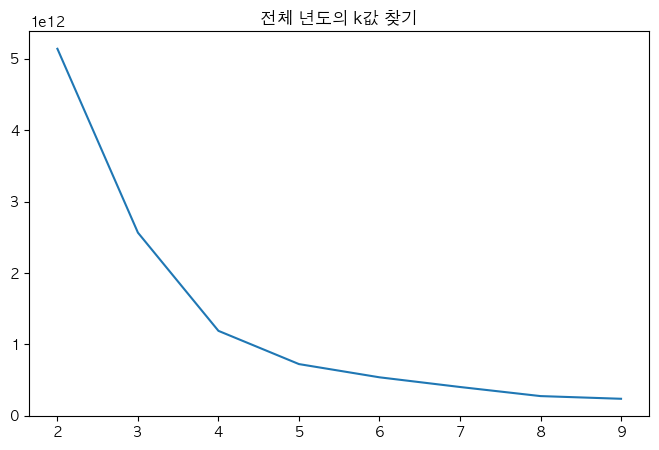

In [66]:
df_temp = df.copy()
df_temp.set_index('시도', inplace=True)
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
df_km = df_temp
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_km)
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

----
### k값 적용(k=4) -> 데이터프레임 컬럼 추가

In [67]:
data_points = df_km.values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3
 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3
 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0
 0 0 0 0 0 0 0 0 2 1 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0]


array([[1.95049262e+05, 1.01237875e+04, 3.37125000e+01, 7.75759125e+04,
        5.29692500e+03, 2.30497900e+04, 3.85136163e+04],
       [1.61312862e+06, 6.88623750e+04, 3.90250000e+02, 4.37333375e+05,
        4.58475000e+04, 5.71485213e+05, 6.76193713e+05],
       [1.85165600e+06, 9.83292500e+04, 2.71375000e+02, 7.43822500e+05,
        5.25488750e+04, 3.22522750e+05, 2.05947125e+04],
       [4.03589850e+05, 2.07180750e+04, 6.76250000e+01, 1.51779725e+05,
        1.13792750e+04, 7.19181200e+04, 4.38354200e+04]])

In [68]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df_km['cluster_id'] = km.labels_
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,2
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,1
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,3
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,3
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,0
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,0
강원도,217897,7835,32,73478,5554,22831.4,23634.2,0


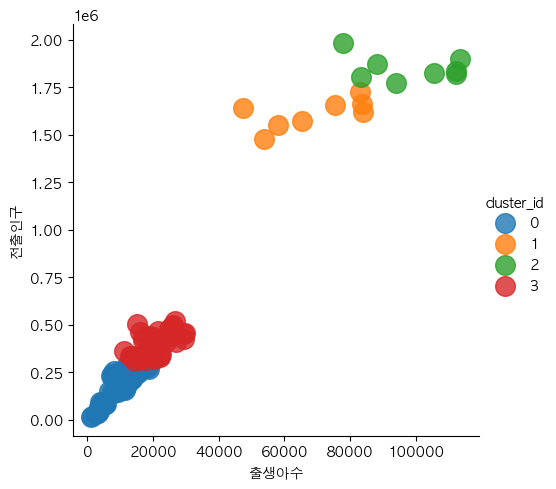

In [69]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

----
# Classification

### Feature, Target

In [70]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [71]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # random_state=42

In [72]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [73]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [74]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [75]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00131774, 0.00061011, 0.00046587, 0.00040817, 0.000386  ]),
 'score_time': array([0.00050402, 0.00032187, 0.00023794, 0.00022078, 0.00021696]),
 'test_score': array([0.95454545, 1.        , 1.        , 0.95238095, 1.        ])}

In [76]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9813852813852814

In [77]:
dt.predict(train_input)

array([3, 0, 0, 0, 3, 2, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 1, 3, 1, 3, 0, 0, 3, 0, 1, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 3, 3, 0, 0, 2, 3, 1, 0, 0, 0, 3, 0, 0, 1, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0],
      dtype=int32)

----
### Random Forest

In [78]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [79]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([2.06898618, 0.0711422 , 0.06316614, 0.05644703, 0.05414581]),
 'score_time': array([0.01615191, 0.0099957 , 0.00809979, 0.00840187, 0.00797534]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [80]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

1.0

In [81]:
rf.predict(test_input)

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 2, 3, 1, 0, 0, 3, 0, 3, 2,
       3, 0, 0, 3, 3, 3], dtype=int32)

> ## Classfication 정확도가 높으므로 Regression으로 시도해보자

In [84]:
df_km.to_csv("../../Data/companies/통합_k.csv", index=False)

In [83]:
df_km

,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster_id
시도,,,,,,,,
경기도,1821303,112129,286,739619,49143,248468.3,13718.5,2
서울특별시,1620640,84066,395,469392,48097,462443.1,532689.2,1
경상남도,423864,29504,65,190166,12612,57288.6,6703.3,3
부산광역시,496161,25831,82,160821,13902,77411.6,59554.5,3
대구광역시,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...
충청북도,226441,8607,40,85135,6103,28669.1,27669.5,0
대전광역시,243418,7481,44,79807,6405,39341.3,38725.4,0
강원도,217897,7835,32,73478,5554,22831.4,23634.2,0


----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

### cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환

In [37]:
df_km['cluster_id'] = df_km['cluster_id'] + 10
df_km_temp = df_km.sort_values(by='전출인구', ascending=True)
temp_list = df_km_temp['cluster_id'].unique()

i = 3
for temp in temp_list:
    df_km['cluster_id'][df_km['cluster_id'] == temp] = i
    i-=1
df_km['cluster_id'] = np.round(df_km['cluster_id'] / 3, 2)
df_km['cluster_id'].unique()

array([0.  , 0.33, 0.67, 1.  ])

In [59]:
# df_km.to_csv("../../Data/companies/통합_k.csv", index=False)

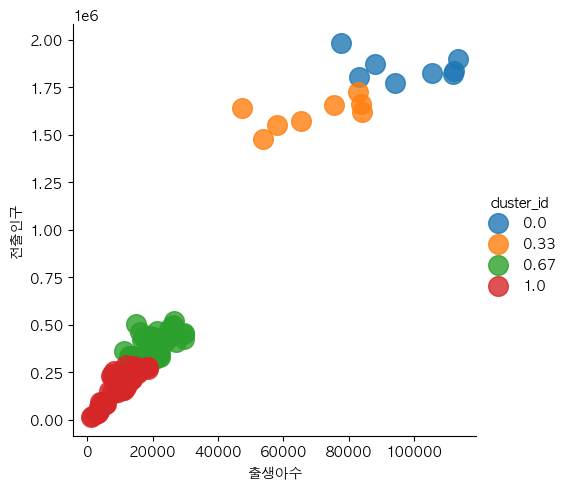

In [38]:
sns.lmplot(x='출생아수', y='전출인구',
            data=df_km, fit_reg=False,
            scatter_kws={'s':200},
            hue="cluster_id"
)
plt.show()

In [39]:
# Feature, Target
data = df_km[['전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생', '예금은행대출금액', '예금액']].to_numpy()
target = df_km['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [40]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [41]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # random_state=42

In [42]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (86, 7)
Valid : (22, 7)
Test  : (28, 7)


----
### Decision Model

In [43]:
# 모델 tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()  # random_state=42
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 1.0


In [44]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
scores

{'fit_time': array([0.00135803, 0.00079226, 0.00048113, 0.00041103, 0.00039029]),
 'score_time': array([0.00063109, 0.00028801, 0.0002408 , 0.000211  , 0.00020385]),
 'test_score': array([0.85241221, 1.        , 0.83073217, 0.90765671, 1.        ])}

In [45]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.9181602171914125

In [46]:
dt.predict(train_input)

array([1.  , 1.  , 0.67, 0.67, 1.  , 1.  , 1.  , 1.  , 0.67, 1.  , 0.67,
       0.67, 0.67, 0.  , 1.  , 0.33, 1.  , 1.  , 1.  , 0.67, 0.67, 1.  ,
       0.  , 0.67, 1.  , 0.33, 1.  , 0.67, 0.33, 0.  , 1.  , 0.67, 0.67,
       0.  , 1.  , 1.  , 0.67, 1.  , 1.  , 0.67, 0.67, 0.33, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.67, 1.  , 0.67, 1.  , 1.  , 1.  ,
       0.33, 1.  , 0.67, 0.67, 0.33, 1.  , 0.33, 1.  , 1.  , 1.  , 0.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.67, 1.  , 0.  , 0.67, 1.  ,
       1.  , 1.  , 1.  , 1.  , 0.67, 1.  , 1.  , 1.  , 0.67, 1.  , 0.67,
       0.67, 1.  , 0.67, 1.  , 0.67, 1.  , 1.  , 0.67, 1.  , 1.  , 0.67,
       1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

----
### Random Forest

In [47]:
# RandomForest
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1) # default:100 # random_state=42
rf.fit(sub_input, sub_target)

print("Train score :", rf.score(sub_input, sub_target))
print("Valid score :", rf.score(val_input, val_target))

Train score : 0.9988430395207536
Valid score : 0.9995587491992313


In [48]:
# 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, train_input, train_target)
scores

{'fit_time': array([0.10172582, 0.09222507, 0.08560991, 0.08381534, 0.0754509 ]),
 'score_time': array([0.01402307, 0.01058578, 0.01118684, 0.01218677, 0.01102901]),
 'test_score': array([0.99314074, 0.99632986, 0.98071474, 0.98363677, 0.99943361])}

In [49]:
# 교차검증 후의 정확도 판단
import numpy as np
np.mean(scores['test_score'])

0.990651142930294

In [50]:
rf.predict(test_input)

array([0.6799, 1.    , 0.67  , 0.67  , 0.6832, 0.67  , 1.    , 1.    ,
       0.67  , 0.67  , 0.    , 1.    , 1.    , 1.    , 0.67  , 0.2607,
       0.6832, 0.9769, 1.    , 1.    , 1.    , 0.67  , 1.    , 1.    ,
       0.6832, 1.    , 1.    , 1.    ])

In [51]:
test_input

array([[3.188030e+05, 2.061600e+04, 5.600000e+01, 1.278250e+05,
        9.740000e+03, 3.730000e+04, 4.245480e+04],
       [2.324140e+05, 1.123800e+04, 1.900000e+01, 9.413400e+04,
        6.157000e+03, 2.222880e+04, 3.233420e+04],
       [4.603040e+05, 1.604000e+04, 6.000000e+01, 1.569280e+05,
        1.321400e+04, 1.020785e+05, 5.194880e+04],
       [3.331180e+05, 1.594600e+04, 8.600000e+01, 1.247080e+05,
        1.022600e+04, 7.109580e+04, 4.835640e+04],
       [3.166420e+05, 1.795700e+04, 5.500000e+01, 1.276420e+05,
        9.951000e+03, 3.922560e+04, 4.328380e+04],
       [4.055610e+05, 1.925000e+04, 5.800000e+01, 1.946060e+05,
        1.140600e+04, 7.823530e+04, 9.847400e+03],
       [1.976680e+05, 1.274200e+04, 4.700000e+01, 8.405200e+04,
        6.105000e+03, 2.207000e+04, 2.261160e+04],
       [1.571850e+05, 1.133000e+04, 3.100000e+01, 6.715600e+04,
        3.700000e+03, 1.956010e+04, 1.458800e+04],
       [3.643640e+05, 1.943800e+04, 8.500000e+01, 1.295830e+05,
        9.664000

In [52]:
rf.predict([[3.131880e+05, 6.773700e+04, 2.650000e+02, 7.617310e+05,
       6.314500e+04, 4.198318e+05, 2.493950e+04]])

array([0.1793])

In [53]:
# # RandomForest
# from sklearn.model_selection import cross_validate
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_jobs=-1, random_state=42) # default:100
# scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1) # 크로스밸리데이션 쓰려면 모델부터 만들어놔야한다 # return_train_score=True > 그래야 점수를 알 수 있다.
# print(np.mean(scores['train_score']), np.mean(scores['test_score']))

----
----
### KFold를 이용한 방법

In [54]:
# from sklearn.model_selection import StratifiedKFold
# splitter = StratifiedKFold() # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [55]:
# np.mean(scores['test_score'])

In [56]:
# # KFold의 Fold 중 10개로 나누어서 교차검증
# splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
# scores = cross_validate(dt, train_input, train_target, cv=splitter)
# scores

In [57]:
# np.mean(scores['test_score'])

> 0.963 (n_splits=10)